# Manual data analysis

# GoodGame (GG): Personalized Video Game
***

## Data Analysis



In [ ]:
#imported databases for whole notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plots

#For database-optimization
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
col_names = ["user-id","game-title","behavior","time-played","0"]

df = pd.read_csv('steam_database.csv')
print(df)

        151603712  The Elder Scrolls V Skyrim  purchase    1.0  0
0       151603712  The Elder Scrolls V Skyrim      play  273.0  0
1       151603712                   Fallout 4  purchase    1.0  0
2       151603712                   Fallout 4      play   87.0  0
3       151603712                       Spore  purchase    1.0  0
4       151603712                       Spore      play   14.9  0
...           ...                         ...       ...    ... ..
199994  128470551                 Titan Souls      play    1.5  0
199995  128470551  Grand Theft Auto Vice City  purchase    1.0  0
199996  128470551  Grand Theft Auto Vice City      play    1.5  0
199997  128470551                        RUSH  purchase    1.0  0
199998  128470551                        RUSH      play    1.4  0

[199999 rows x 5 columns]


In [ ]:
df.head(2)

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0


## Data Analysis Summary

### Alerts
---
- **Constant Value:** The column 0 has a constant value 0. Constant columns won't provide much useful information for analysis because they don't vary across rows.  Ergo we assume that it should not be included in the analysis.
---
- **Duplicate Rows:** The dataset contains 707 duplicate rows (approximately 0.4%). Duplicate rows can skew the analysis and might indicate data entry errors or issues with data collection. By removing duplicate rows we will ensure the integrity of our analysis.
---
- **Skewness:** The variable time-played which accounts for time played has a skewness value of 25.03533573 indicating positive skewness. Highly skewed data can affect the performance of some statistical methods that assume normality and transformations may be needed.
---
### Conclusions

Based on the automated analysis of the dataset, the following conclusions can be drawn:

- **Data Overview:** The dataset contains 299999 rows and 5 columns. Initial exploration reveals that for games to be observed as played a row of purchase is preceded.

---
- **Missing Values:** There are no missing values, thus for matrix completion new rows must be created.

---

#### User-ID Analysis

- **User-ID Overview:**
  - There are 12,393 distinct users, constituting 6.2% of the database.
  - The user with the most games is 62990992, having bought/played 1573 games.
  - The second-highest user is 33865373, with 949 occurrences.

- **User-ID Range:**
  - The user with the smallest ID is 5250, and the largest is \(3.0990315 * 10^8\).
  - There is an abnormal increase in user-ID numbers, leading to a skewed distribution.
  
- **User-ID Statistics:**
  - The median of user-id is 86912006, indicating a concentration towards the lower end.
  - The standard deviation is 72080735, while the mean is \(1.0365587 \times 10^8\), further highlighting the skewed distribution.

---


#### Game Title Analysis

- **Game Titles Overview:**
  - There are 5,155 different game titles, representing 2.6% of the database.
  - The most common word is "2," indicating sequels to games that are highly purchased.
  - Recommending sequels for users who bought the first installment might be effective.

- **Title Length:**
  - Each game title ranges from 1 to 82 characters.

- **Unicode Character Analysis:**
  - Distinct characters in game titles: 84
  - Distinct categories: 11
  - Distinct scripts: 2
---

#### Purchase and Play Behavior Analysis

- **Behavior Counts:**
  - The dataset includes two behaviors: "purchase" and "play."
  - The count for "purchase" is 129,511 with a frequency of 64.8%.
  - The count for "play" is 70,489 with a frequency of 35.2%.

- **Comparison:**
  - Purchased games outnumber played games, aligning with the expected behavior as explained in the proposal PDF regarding hoarders.
  - The data indicates that users tend to purchase more games than they actually play.

- **Percentage of Played Games:**
  - Only 54.42% of the purchased games have been played.
---

 #### Time Played Analysis

- **Common Values:**
  - The most common value for time played is 1. However, it may lead to false predictions since the value 1 is also present in observations where a game is being purchased.

- **Range of Values:**
  - The minimum time played is 0.1 hours (10 minutes), and the maximum is 11,753 hours. The maximum value seems to be a potential outlier and warrants further investigation.

- **Descriptive Statistics:**
  - Mean time played: 17.87 hours.
  - Variance: 19,059.722.
  - The sum of all hours played accounts for 3,574,876.8, excluding the time spent on purchased games (129,511 observations).
---
### Database Optimization

1. **Removal of Constant Column:**
   - The value=0 column does not provide meaningful information for analysis, its removal can enhance database efficiency.
---
2. **Removal of Duplicate Observations:**
   - Duplicate observations can impact analysis and may result from data entry errors or other issues. Removing duplicate rows can improve the accuracy of the analysis.
---
3. **Handling of Outliers in Time Played:**
   - Investigate and handle potential outliers in the time played column. Extreme values may skew analysis results.
---
4. **Set 'time-played' to 0 for purchased games:**
   -Convertion of all instances of '1.0' to zero when behavior = purchase. This adjustment can help streamline and standardize the representation of purchase behavior in the dataset and provide more accurate results for time played in each game.
---
5. **Optimize Data Types:**
   - Changing the behavior column to a binary approach (0 for purchase, 1 for play). This binary representation can reduce memory usage and enhance computational efficiency.
---
6. **Removal of column behavior**
    - Since we have set time-played to 0 for purch
---
7. **Normalization**
    - Normalizing 'time-played' transforms its values to a standard scale, ensuring fair feature contributions in models like collaborative filtering. It facilitates efficient optimization, and helps handle outliers, contributing to improved overall model performance in recommendation systems.
---
8. **Sorting:**
    - Experimentation on the sorting of data : on user-id, behavior or game-tile

---

In [ ]:
# Re-importing pandas and re-loading the dataset as the execution state was reset
import pandas as pd

# Re-load the dataset
file_path = 'steam_database.csv'
steam_data = pd.read_csv(file_path, header=None)

# Filtering for purchase and play data
purchase_data = steam_data[steam_data[2] == 'purchase']
play_data = steam_data[steam_data[2] == 'play']

# Counting purchases for each game
purchase_counts = purchase_data[1].value_counts()

# Summing play hours for each game
play_hours = play_data.groupby(1)[3].sum()

# Getting the top 10 purchased and played games
top_10_purchased = purchase_counts.head(10)
top_10_played = play_hours.sort_values(ascending=False).head(10)

print("Top 10 puchased:");
print(top_10_purchased);
print("----")
print("Top 10 played:");

print(top_10_played);

# Merging the purchase counts and play hours data
merged_data = pd.DataFrame({'Purchases': purchase_counts, 'Total Playtime': play_hours}).dropna()

# Calculating the Pearson correlation coefficient
correlation = merged_data.corr(method='pearson')
print("---")
print("correlation is: ",correlation);


Top 10 puchased:
Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
Counter-Strike Source               978
Left 4 Dead 2                       951
Counter-Strike                      856
Warframe                            847
Half-Life 2 Deathmatch              823
Name: 1, dtype: int64
----
Top 10 played:
1
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                      

## User engagment analysis

In [ ]:
# Calculating average playtime per game
average_playtime_per_game = play_data.groupby(1)[3].mean()

# Getting the top 10 games with highest average playtime
top_10_average_playtime = average_playtime_per_game.sort_values(ascending=False).head(10)

# Also, calculating total number of players per game
total_players_per_game = play_data[1].value_counts()

# Merging average playtime and total players data for a more comprehensive view
engagement_data = pd.DataFrame({'Average Playtime': average_playtime_per_game, 'Total Players': total_players_per_game}).dropna()
top_10_engagement_data = engagement_data.sort_values(by='Average Playtime', ascending=False).head(10)

top_10_engagement_data


,Average Playtime,Total Players
Eastside Hockey Manager,1295.000000,1
Baldur's Gate II Enhanced Edition,475.255556,9
FIFA Manager 09,411.000000,1
Perpetuum,400.975000,4
Football Manager 2014,391.984615,78
Football Manager 2012,390.453165,79
Football Manager 2010,375.048571,35
Football Manager 2011,365.703226,31
Freaking Meatbags,331.000000,1
Out of the Park Baseball 16,330.400000,2



The "Football Manager" series shows up frequently in this list, indicating that while these games might not have the highest number of purchases, the users who do purchase them tend to spend a lot of time playing.

Games like "Eastside Hockey Manager" and "FIFA Manager 09" have very high playtime per purchase ratios but it's important to note that they have a very low number of purchases, which could skew the data.

# Data cleanup

# Handling missing values

In [ ]:
# Checking for missing values in the dataset
missing_values = steam_data.isnull().sum()
missing_values_any = missing_values.any()
print("Does it have missing values? ",missing_values_any);

Does it have missing values?  False


Since the dataset doesnt have any missing values we dont need to do anything about them.

# Handling unused data


In [ ]:
#Optimized Dataset

col_names = ["user-id","game-title","behavior","time-played","0"]

df = pd.read_csv("steam_database.csv",names=col_names)

print(len(df))

#Removal of Constant Column
df = df.drop(columns="0", axis=1)

#Removal of Duplicate Observations
df = df.drop_duplicates()


print(len(df))
print(df.head(1))

200000
199293
     user-id                  game-title  behavior  time-played
0  151603712  The Elder Scrolls V Skyrim  purchase          1.0


## Handling outliers

In [ ]:
#Z-score Handling Outliers in time played (maybe handle outliers after normalization)
z_scores = stats.zscore(df["time-played"])
z_score_threshold=2;
df = df[(z_scores <= z_score_threshold) & (z_scores >= -z_score_threshold)]

print(len(df))

196878


## Fixing the data

In [ ]:
#Data convertion
df['behavior'] = df['behavior'].apply(lambda x: 1 if x == 'play' else 0)

# Convert '1.0' to '0' in 'time-played' when 'behavior' is 0
df.loc[df['behavior'] == 0, 'time-played'] = 0

print(df.head(5))

     user-id                  game-title  behavior  time-played
0  151603712  The Elder Scrolls V Skyrim         0          0.0
1  151603712  The Elder Scrolls V Skyrim         1        273.0
2  151603712                   Fallout 4         0          0.0
3  151603712                   Fallout 4         1         87.0
4  151603712                       Spore         0          0.0


In [ ]:
# Removal of rows with purchase when sb has played the game
# Computationally expensive but provides optimization through dimension reduction

df_opt = df

purchase_play_rows = df_opt[df_opt.duplicated(['user-id', 'game-title'], keep=False) & (df_opt['behavior'] == 0)]
for index, row in purchase_play_rows.iterrows():
        df_opt = df_opt.drop(index)

df_opt = df_opt.drop(columns=["behavior"])

print(len(df_opt))
print(df_opt.head(5))

128815
     user-id                  game-title  time-played
1  151603712  The Elder Scrolls V Skyrim        273.0
3  151603712                   Fallout 4         87.0
5  151603712                       Spore         14.9
7  151603712           Fallout New Vegas         12.1
9  151603712               Left 4 Dead 2          8.9


In [ ]:
# Normalization
scaler = MinMaxScaler()
df_opt['normalized-time-played'] = scaler.fit_transform(df_opt[['time-played']])

In [ ]:
#Experimental
df_sorted = df.sort_values(by='user-id')
df_sorted

,user-id,game-title,behavior,time-played
65449,5250,Team Fortress Classic,0,0.0
65448,5250,Ricochet,0,0.0
65423,5250,Cities Skylines,0,0.0
65424,5250,Cities Skylines,1,144.0
65425,5250,Deus Ex Human Revolution,0,0.0
...,...,...,...,...
170024,309812026,Counter-Strike Nexon Zombies,0,0.0
10221,309824202,Dota 2,0,0.0
10222,309824202,Dota 2,1,0.7
129084,309903146,Dota 2,0,0.0


### Saving the dataset

In [ ]:
# Aggregating the data by summing up the playtime for each user-game combination
aggregated_data = df_sorted.groupby(['user-id', 'game-title']).agg({'time-played': 'sum'}).reset_index()
aggregated_data

,user-id,game-title,time-played
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Counter-Strike,0.0
3,5250,Counter-Strike Source,0.0
4,5250,Day of Defeat,0.0
...,...,...,...
128799,309626088,Age of Empires II HD Edition,6.7
128800,309812026,Counter-Strike Nexon Zombies,0.0
128801,309812026,Robocraft,0.0
128802,309824202,Dota 2,0.7


In [ ]:

file_path_to_save = "steam_new.csv"  # You can change this to your desired file path and name

# Save to CSV
aggregated_data.to_csv(file_path_to_save, index=False)  # Set index=False if you don't want to include the row indices


## PCA Analysis

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


# Load the dataset
file_path = 'steam_database.csv'
data = pd.read_csv(file_path, header=None)
# Filtering out the purchase records, keeping only play records
play_data = data[data[2] == 'play']

# Creating a pivot table where the index is the user ID, columns are the games, and values are hours played
user_game_matrix = play_data.pivot_table(index=0, columns=1, values=3, fill_value=0)

# Now we perform PCA
# Considering the size of the dataset, we will choose a number of components that explains a substantial amount of variance
# Let's start with a number like 20 and see how much variance is explained
n_components = 20
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(user_game_matrix)

# Calculating the explained variance
explained_variance = pca.explained_variance_ratio_.sum()

user_game_matrix.shape, pca_result.shape, explained_variance


((11350, 3600), (11350, 20), 0.9109403093377662)

To perform PCA (Principal Component Analysis), we need numerical data. The user-id, behavior, and time-played are numerical, but game-title is categorical.

For PCA, we could encode game-title into numerical form, but it might not be meaningful due to the nature of the data. Alternatively, we can focus on the numerical columns and ignore game-title for this analysis.

The dataset contains 5,155 unique game titles. This is a large number, and using one-hot encoding will create thousands of additional columns, which might not be practical for PCA due to high dimensionality and increased computational complexity.



# Recommendation systems

---





### Content-Based filtering

Before we do anything, we need to use another database that contains valuable info about the steam games. The database we used [can be found here](https://www.kaggle.com/datasets/mexwell/steamgames). After that we take the database, we keep only the data that is contained in our steam-200k dataset.

In [ ]:
import pandas as pd
print("Loading database");
# Load the initial dataset
initial_data = pd.read_csv('steam_database.csv')

# Load the larger database
larger_database = pd.read_csv('games.csv')

# Extract unique game titles from the initial dataset
unique_games = initial_data['game-title'].unique()

# Filter the larger database
filtered_database = larger_database[larger_database['Name'].isin(unique_games)]

# Save the filtered database if needed
filtered_database.to_csv('filtered_database.csv', index=False)
print("Saving database");

Loading database


FileNotFoundError: [Errno 2] No such file or directory: 'steam_database.csv'

We notice that only 2.153 games can be found from our database. This is probably due to the steam-200k database using game titles and not game ids. Hence games with different ways to spell the game title are lost. None the less we are going to filter out only those games and try to see the result

In [ ]:
import pandas as pd

def filter_user_data(detailed_games_df, aggregated_user_df, save_path=None):
    """
    Filter the aggregated user interaction dataset to include only games present in the detailed games dataset.

    :param detailed_games_df: DataFrame of detailed games data.
    :param aggregated_user_df: DataFrame of aggregated user interaction data.
    :param save_path: Optional path to save the filtered dataset. If None, the dataset will not be saved.
    :return: Filtered DataFrame of user interactions.
    """
    # Extract unique game names from the detailed games dataset
    unique_game_names = detailed_games_df['Name'].unique()

    # Filter the user interaction dataset
    filtered_user_data = aggregated_user_df[aggregated_user_df['game-title'].isin(unique_game_names)]

    # Optionally save the filtered data to a CSV file
    if save_path:
        filtered_user_data.to_csv(save_path, index=False)

    return filtered_user_data

# # Example usage
# detailed_games_path = 'filtered_games_data.csv'
# aggregated_data_path = 'aggregated-200k.csv'
# # Load the detailed games dataset
# detailed_games_data = pd.read_csv(detailed_games_path)

# # Load the aggregated user interaction dataset
# aggregated_user_data = pd.read_csv(aggregated_data_path)
# # Assuming detailed_games_data and aggregated_user_data are already loaded as pandas DataFrames
# filtered_data = filter_user_data(detailed_games_data, aggregated_user_data, 'merged-steam-200k.csv')


# # Displaying the first few rows of the filtered data
# print(filtered_data.head(), len(filtered_data))


After all the that we are going to apply the Content-based filtering.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def prepare_data(df):
    df = df[['Name', 'Genres', 'Tags']].copy()
    df['Genres'] = df['Genres'].fillna('Unknown')
    df['Tags'] = df['Tags'].fillna('Unknown')
    df['combined_features'] = df['Genres'] + ' ' + df['Tags']

    # Check if combined_features column is empty
    if df['combined_features'].str.strip().eq('').all():
        return None, None, None
    # Vectorizing the combined features using TF-IDF
    try:
        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])
    except ValueError as e:
        print(f"Error during vectorization: {e}")
        return None, None, None

    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    game_indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

    return cosine_sim, game_indices, df['Name']



def get_content_based_recommendations(titles_list, df, top_n=5):
    cosine_sim_matrix, indices, titles = prepare_data(df)
    if(cosine_sim_matrix is None):
        return [];
    print(f"Size of cosine similarity matrix: {cosine_sim_matrix.shape}")  # Debugging line

    # Convert titles in DataFrame to lowercase for matching
    indices.index = indices.index.str.lower()

    avg_sim_scores = np.zeros(cosine_sim_matrix.shape[0])
    input_game_indices = []

    for title in titles_list:
        # Convert title to lowercase for matching
        title_lower = title.lower()
        if title_lower in indices:
            idx = indices[title_lower]
            print(f"Index for {title}: {idx}")  # Debugging line

            # Additional check to see if index is within bounds
            if isinstance(idx, pd.Series):
                if any(idx.values >= cosine_sim_matrix.shape[0]):
                    print(f"Index out of bounds for title {title}")
                    continue
                input_game_indices.extend(idx.values)
                sim_scores = np.mean(cosine_sim_matrix[idx.values], axis=0)
            else:
                if idx >= cosine_sim_matrix.shape[0]:
                    print(f"Index out of bounds for title {title}")
                    continue
                input_game_indices.append(idx)
                sim_scores = cosine_sim_matrix[idx]

            sim_scores = sim_scores.flatten()
            avg_sim_scores += sim_scores
        else:
            return [f"Game title not found: {title}"]

    avg_sim_scores /= len(titles_list)
    sorted_indices = np.argsort(avg_sim_scores)[::-1]
    recommended_game_indices = [i for i in sorted_indices if i not in input_game_indices][:top_n]

    return titles.iloc[recommended_game_indices].tolist()


# Example usage
detailed_games_data = pd.read_csv('filtered_games_data.csv')
top_n = 10
sample_games = ['Max Payne']
recommendations = get_content_based_recommendations(sample_games, detailed_games_data, top_n)

print("------------")
print("The top ", top_n, " games to play if you like ", sample_games, " are:")
print(recommendations)

sample_games = ['Max Payne', 'Grand Theft Auto V', 'Mafia']
recommendations = get_content_based_recommendations(sample_games, detailed_games_data, top_n)

print("------------")
print("The top ", top_n, " games to play if you like ", sample_games, " are:")
print(recommendations)


Size of cosine similarity matrix: (2324, 2324)
Index for Max Payne: 3
------------
The top  10  games to play if you like  ['Max Payne']  are:
['Max Payne 3', 'The Evil Within', "Alan Wake's American Nightmare", 'Alan Wake', 'F.E.A.R.', 'Silent Hill Homecoming', 'Mafia', 'Call of Juarez', 'L.A. Noire', 'Dead Space']
Size of cosine similarity matrix: (2324, 2324)
Index for Max Payne: 3
Index for Grand Theft Auto V: 2147
Index for Mafia: 441
------------
The top  10  games to play if you like  ['Max Payne', 'Grand Theft Auto V', 'Mafia']  are:
['Just Cause', 'Max Payne 3', 'Advent Rising', 'Grand Theft Auto 2', 'Bionic Commando', 'Call of Juarez', 'Collapse', 'I Am Alive', 'Damnation', 'Saints Row 2']


## **Collaborative filtering**

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.decomposition import TruncatedSVD

# Load the dataset
file_path = 'merged-steam-200k.csv'  # Replace with your file path
data = pd.read_csv(file_path)

train_data, test_data = train_test_split(data, test_size=0.01, random_state=43)

# scoredData = ir(data, selections, pay=True, categories=None, recent=False);

# Creating the user-game matrix
user_game_matrix_df = train_data.pivot(
    index='user-id',
    columns='game-title',
    values='time-played'
).fillna(0)

# Converting the dataframe to a sparse matrix
user_game_matrix = csr_matrix(user_game_matrix_df.values)
# Setting up the kNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=15, n_jobs=-1)
model_knn.fit(user_game_matrix.T)  # Transpose matrix to get game-game similarities

def get_game_recommendations(game_titles, data_matrix, model, n_recommendations=5):
    game_recommendations = Counter()
    distance_weighting = {}
    for game in game_titles:
        if game in data_matrix.columns:
            game_idx = data_matrix.columns.get_loc(game)
            distances, indices = model.kneighbors(data_matrix.iloc[:, game_idx].values.reshape(1, -1), n_neighbors=n_recommendations+1)

            for dist, idx in zip(distances.flatten()[1:], indices.flatten()[1:]):
                recommended_game = data_matrix.columns[idx]
                if recommended_game != game:
                    inverse_distance = 1 / (dist + 0.0001)  # Adding a small constant to avoid division by zero
                    distance_weighting[recommended_game] = distance_weighting.get(recommended_game, 0) + inverse_distance
        else:
            return [f"Game title not found: {game}"]

    # Sorting recommended games based on their accumulated inverse distance
    sorted_recommendations = sorted(distance_weighting, key=distance_weighting.get, reverse=True)[:n_recommendations]

    return sorted_recommendations




# Example usage
top_n=10;
sample_game = ['Max Payne']  # Replace with any game title from the dataset
recommendations = get_game_recommendations(sample_game, user_game_matrix_df, model_knn,top_n)
print("                      ")
print("------------")
print("The top ",top_n," games to play are if you like ",sample_game," is:")
print("                      ")
print(recommendations)

sample_games = ['Max Payne','Grand Theft Auto V','Mafia']
recommendations = get_game_recommendations(sample_games, user_game_matrix_df, model_knn, top_n)

print("                      ")
print("------------")
print("The top ",top_n," games to play are if you like ",sample_games," is:")
print("                      ")
print(recommendations)




                      
------------
The top  10  games to play are if you like  ['Max Payne']  is:
                      
['Platypus', 'Road Redemption', 'Insurgency', 'Renegade Ops', 'Platypus II', 'Max Payne 3', 'The Darkness II', 'Remember Me', 'TIS-100', 'Red Faction Guerrilla Steam Edition']
                      
------------
The top  10  games to play are if you like  ['Max Payne', 'Grand Theft Auto V', 'Mafia']  is:
                      
['Platypus', 'Road Redemption', 'Karate Master 2 Knock Down Blow', 'Damned', 'Insurgency', 'Renegade Ops', 'Platypus II', 'Way of the Samurai 4', 'Sherlock Holmes versus Jack the Ripper', 'Max Payne 3']


## **Reviewing the two methods**



---

After looking at an example like Max Payne and our own personal knowledge of games we can see that both methods contain some good and some bad recommendations. For example, content based recommends that the best game to play is Max Payne 3, which makes sense considering that it's a sequel of the original game. The evil within is also a game that maches the style of max payne. Doom II which is basically considered one of the best early FPS Shooters of all time is lost in the dataset due to the way that the GameData was handled.


---


The Collaborative filtering reccommends good games like Doom II and Wolfensteine but also recommends games that don't have anything to do with Max payne and fps like Platypus.

## **The need of a hybrid system**

---

After taking a look at the above recommendation system there arises a new need to combine the two to have the best recommendation for the users.


In [ ]:
def get_hybrid_recommendations(game_title, recommendations_cb, recommendations_cf, cb_weight=0.5, cf_weight=0.5, top_n=5):
    # Combine and rank recommendations
    combined_recommendations = {}
    total_recommendations = len(recommendations_cb) + len(recommendations_cf)

    for i, game in enumerate(recommendations_cb):
        combined_recommendations[game] = combined_recommendations.get(game, 0) + cb_weight * (total_recommendations - i)

    for i, game in enumerate(recommendations_cf):
        combined_recommendations[game] = combined_recommendations.get(game, 0) + cf_weight * (total_recommendations - i)

    # Sort games based on combined score
    sorted_recommendations = sorted(combined_recommendations, key=combined_recommendations.get, reverse=True)

    # Return top N recommendations
    return sorted_recommendations[:top_n]

In [ ]:
sample_games = ['Max Payne','Grand Theft Auto V','Mafia']
recommendations_cb = get_content_based_recommendations(sample_games,detailed_games_data,10)

recommendation_cf = get_game_recommendations(sample_games, user_game_matrix_df, model_knn)

hybrid_recommendation = get_hybrid_recommendations(sample_games,recommendations_cb,recommendation_cf)

print(hybrid_recommendation)

Size of cosine similarity matrix: (2324, 2324)
Index for Max Payne: 3
Index for Grand Theft Auto V: 2147
Index for Mafia: 441
['Just Cause', 'Platypus', 'Max Payne 3', 'Road Redemption', 'Advent Rising']


#Retrieval, Scoring, Re-ranking

## Information Retrieval
---

1. Broad Filtering: In the retrieval phase, the model sifts through the entire dataset to find a subset of items (games, in your case) that are potentially relevant. This step is about casting a wide net to ensure no potentially suitable recommendations are missed.

2. Efficiency: Effective retrieval methods can greatly improve the efficiency of your recommendation system, especially when dealing with large datasets. It reduces the computational burden by filtering out irrelevant items early in the process.

3. Customized Criteria: You can incorporate various filters (like genre, platform, user ratings) tailored to user preferences, improving the relevance of the retrieved items.

In [ ]:
def ir(df, selections, pay=True, categories=None, recent=False):
    # Convert 'Release date' to datetime
    df['Release date'] = pd.to_datetime(df['Release date'])

    # Extract the games that the user is interested in.
    df_ir = df[df['Genres'].str.contains(selections, case=False, na=False)]

    # Filter by median playtime
    df_ir = df_ir[df_ir['Median playtime forever'] > df_ir['Median playtime forever'].mean()]

    # Filter by price
    if not pay:
        df_ir = df_ir[df_ir['Price'] == 0]

    # Filter by categories if specified
    if categories:
        # If categories is a single string, convert it into a list
        if isinstance(categories, str):
            categories = [categories]
        # Use regex pattern for multiple categories
        pattern = '|'.join(categories)
        df_ir = df_ir[df_ir['Categories'].str.contains(pattern, case=False, na=False)]

    # Sort by release date if recent is True
    if recent:
        df_ir = df_ir.sort_values(by='Release date', ascending=False)

    return df_ir

## Scoring
---

1. Ranking Based on Relevance: After retrieval, each item is scored based on its relevance to the user’s preferences and behavior. This is where your machine learning algorithms mainly come into play.

2. Precision: A well-tuned scoring algorithm increases the precision of your recommendations, ensuring that the highest-ranking items are those most likely to be of interest to the user.

3. Utilizing User Data: By leveraging user data (like past behavior, ratings, playtime), the scoring process becomes more personalized, leading to higher user satisfaction.

In [ ]:
def scr(df, usr_pref):
    # Initialize the score column.
    df['Score'] = 0

    # Iterate over each user preference category and value.
    for category, value in usr_pref.items():
        # Increase the score if the game matches the user preference.
        df['Score'] += df[category].apply(lambda x: 1 if x == value else 0)

    return df

## Re-Ranking
---
1. Diversity and Serendipity: Re-ranking allows you to introduce diversity into your recommendations, ensuring that the user is exposed to a broader range of games, which can enhance user engagement and satisfaction.

2. Balancing Different Objectives: You can balance multiple objectives in this phase, like promoting newer or less popular games, optimizing for commercial goals (like sales or promotions), or adhering to fairness and ethical guidelines.

3. Contextual Adjustments: Re-ranking can be used to adjust recommendations based on current context or trends, making the system more dynamic and responsive to changes.

In [ ]:
def re_rank(df):
    # Ensure 'Release date' is in datetime format
    df['Release date'] = pd.to_datetime(df['Release date'])

    # Normalize 'Median playtime forever' and 'Positive' columns
    df['Normalized Playtime'] = (df['Median playtime forever'] - df['Median playtime forever'].min()) / (df['Median playtime forever'].max() - df['Median playtime forever'].min())
    df['Normalized Positive'] = (df['Positive'] - df['Positive'].min()) / (df['Positive'].max() - df['Positive'].min())

    # Calculate a combined score for re-ranking
    df['ReRank Score'] = df['Normalized Playtime'] + df['Normalized Positive'] - (2023 - df['Release date'].dt.year)

    # Deduplicate genres for diversity
    unique_genres = df['Genres'].unique()
    re_ranked_df = pd.DataFrame()

    for genre in unique_genres:
        genre_games = df[df['Genres'] == genre].sort_values(by='ReRank Score', ascending=False)
        re_ranked_df = pd.concat([re_ranked_df, genre_games])

    return re_ranked_df.sort_values(by='ReRank Score', ascending=False)

## **Accuracy measurements**

### Mean Reciprocal Rank

In [ ]:
def get_user_preferences(game_names, games_data):
    """
    Returns a user preference dictionary with all genres and categories based on the list of game names.

    :param game_names: List of game names.
    :param games_data: DataFrame containing game information.
    :return: Dictionary of user preferences with all genres and categories.
    """
    # Initialize sets to store unique genres and categories
    genres = set()
    categories = set()

    # Iterate over each game name in the list
    for game_name in game_names:
        # Find the game in the DataFrame
        game_info = games_data[games_data['Name'].str.lower() == game_name.lower()]

        # If the game is found, process its genres and categories
        if not game_info.empty:
            game_genres = game_info['Genres'].values[0]
            game_categories = game_info['Categories'].values[0]

            if isinstance(game_genres, str):
                genres.update(game_genres.split(','))

            if isinstance(game_categories, str):
                categories.update(game_categories.split(','))

    return {
        'Genres': list(genres),
        'Categories': list(categories)
    }


In [ ]:
import numpy as np
import pandas as pd
import random


def get_recommendations_for_user_hybrid(known_games, df_users, df_steam,model, n_recommendations=100):
    recommendations_cb = get_content_based_recommendations(known_games,df_steam,top_n)

    recommendation_cf = get_game_recommendations(known_games, df_users, model,20)
    hybrid_recommendation = get_hybrid_recommendations(known_games,recommendations_cb,recommendation_cf,20)
    return hybrid_recommendation

def get_recommendations_for_user_content(known_games, df_steam, top_n=100):
    recommendations_cb = get_content_based_recommendations(known_games,df_steam,top_n)
    return recommendations_cb

def get_recommendations_for_user_collab(known_games, df, model, n_recommendations=100):
    recommendation_cf = get_game_recommendations(known_games, df, model,20)
    return recommendation_cf


# Function to calculate MRR for a single user
def calculate_mrr(user_known, user_target, recommendations):
    for i, game in enumerate(recommendations, start=1):
        if game in user_target:
            return 1 / i
    return 0  # No relevant recommendation found

# Splitting the test data into known and target sets for each user
def split_user_games(user_data):
    user_games = list(user_data['game-title'].unique())
    random.shuffle(user_games)  # Shuffle the games randomly
    midpoint = len(user_games) // 2
    known_games = user_games[:midpoint]
    target_games = user_games[midpoint:]
    return known_games, target_games

# Load the dataset
file_path = 'merged-steam-200k.csv'  # Replace with your file path
user_data = pd.read_csv(file_path)

train_data, test_data = train_test_split(user_data, test_size=0.1, random_state=43)

# Apply the split to the test data
test_user_splits = test_data.groupby('user-id').apply(split_user_games)


# Creating the user-game matrix
user_game_matrix_df = train_data.pivot(
    index='user-id',
    columns='game-title',
    values='time-played'
).fillna(0)

# Converting the dataframe to a sparse matrix
user_game_matrix = csr_matrix(user_game_matrix_df.values)


# Prepare a list to store MRR for each user
mrr_scores_content = []
mrr_scores_collab = []
mrr_scores_hybrid = []
mrr_scores_content_without = []
mrr_scores_collab_without = []
mrr_scores_hybrid_without = []

total_users = len([user for user, (games, _) in test_user_splits.items() if games])
current_user = 0

steam_games = 'filtered_games_data.csv'  # Replace with your file path
games_data = pd.read_csv(steam_games)

include_0_mrr=True;
# Loop through each user in the test set
for user_id, (filtered_known_games, target_games) in test_user_splits.items():
    # Check if filtered_known_games is not empty
    if filtered_known_games:

        current_user += 1
        print(f"Processing user {current_user} of {total_users}: {filtered_known_games}")

        user_preferences = get_user_preferences(filtered_known_games,games_data)
        print(f"User preferences{user_preferences}")

        # Assuming user_preferences['Genres'] contains the list of genres
        user_genres = user_preferences['Genres']

        # Converting the list of genres into a string separated by '|'
        genres_string = '|'.join(user_genres)

        print(genres_string)
        print(user_preferences['Categories'])

        preference_df = ir(games_data, genres_string,False,user_preferences['Categories'],False);
        # df = ir(df, "Action|Adventure", False, ["Single-player","Multi-player"], True)
        pref_user_df = filter_user_data(preference_df, user_data);

        # Creating the user-game matrix
        user_game_matrix_df = train_data.pivot(
            index='user-id',
            columns='game-title',
            values='time-played'
        ).fillna(0)

        # Converting the dataframe to a sparse matrix
        user_game_matrix = csr_matrix(user_game_matrix_df.values)




        model_svd = TruncatedSVD(n_components=20, random_state=42)
        user_game_matrix_reduced = model_svd.fit_transform(user_game_matrix)

        # Setting up the kNN model
        model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=15, n_jobs=-1)
        model_knn.fit(user_game_matrix.T)  # Transpose matrix to get game-game similarities

        recommendations_content = get_recommendations_for_user_content(filtered_known_games,games_data,100)
        mrr_content = calculate_mrr(filtered_known_games, target_games, recommendations_content)
        mrr_scores_content.append(mrr_content)
        if( mrr_content>0):
          mrr_scores_content_without.append(mrr_content)
        print(f"Recommended {recommendations_content}")
        print(f"MRR Score {mrr_content}")
        recommendations_collab = get_recommendations_for_user_collab(filtered_known_games,user_game_matrix_df, model_knn)
        mrr_collab = calculate_mrr(filtered_known_games, target_games, recommendations_collab)
        mrr_scores_collab.append(mrr_collab)
        if(mrr_collab>0):
          mrr_scores_collab_without.append(mrr_collab)
        print(f"Recommended {recommendations_collab}")
        print(f"MRR Score {mrr_collab}")

        recommendations_hybrid = get_recommendations_for_user_hybrid(filtered_known_games,user_game_matrix_df , games_data, model_knn,100)
        mrr_hybrid = calculate_mrr(filtered_known_games, target_games, recommendations_hybrid)
        mrr_scores_hybrid.append(mrr_hybrid)
        if(mrr_hybrid>0):
          mrr_scores_hybrid_without.append(mrr_hybrid)
        print(f"Recommended {recommendations_hybrid}")
        print(f"MRR Score {mrr_hybrid}")

# Calculate the average MRR
average_mrr_hybrid = np.mean(mrr_scores_hybrid)
average_mrr_content = np.mean(mrr_scores_content)
average_mrr_collab = np.mean(mrr_scores_collab)
print(f"Average MRR of content based filtering: {average_mrr_content}")
print(f"Average MRR of collaborative filtering: {average_mrr_collab}")
print(f"Average MRR of the hybrid method: {average_mrr_hybrid}")

# Calculate the average MRR
print("If we exclude the 0 mrr scores");
average_mrr_hybrid = np.mean(mrr_scores_hybrid_without)
average_mrr_content = np.mean(mrr_scores_content_without)
average_mrr_collab = np.mean(mrr_scores_collab_without)
print(f"Average MRR of content based filtering: {average_mrr_content}")
print(f"Average MRR of collaborative filtering: {average_mrr_collab}")
print(f"Average MRR of the hybrid method: {average_mrr_hybrid}")


**MRR Score**

>Average MRR of content based filtering: 0.03889542666018605

>Average MRR of collaborative filtering: 0.013295945519915864

>Average MRR of the hybrid method: 0.025263540530716104

**If we exclude the 0 mrr scores**

>Average MRR of content based filtering: 0.09410845975564804

>Average MRR of collaborative filtering: 0.15433394989573224

>Average MRR of the hybrid method: 0.47278911564625853

Note that only the rank of the first relevant answer is considered, possible further relevant answers are ignored. If users are interested also in further relevant items, mean average precision is a potential alternative metric.

In [ ]:
import numpy as np
import pandas as pd
import random


def get_recommendations_for_user_hybrid(known_games, df_users, df_steam,model, n_recommendations=100):
    recommendations_cb = get_content_based_recommendations(known_games,df_steam,n_recommendations)

    recommendation_cf = get_game_recommendations(known_games, df_users, model,n_recommendations)
    hybrid_recommendation = get_hybrid_recommendations(known_games,recommendations_cb,recommendation_cf,n_recommendations)
    return hybrid_recommendation

def get_recommendations_for_user_content(known_games, df_steam, top_n=100):
    recommendations_cb = get_content_based_recommendations(known_games,df_steam,top_n)
    return recommendations_cb

def get_recommendations_for_user_collab(known_games, df, model, n_recommendations=100):
    recommendation_cf = get_game_recommendations(known_games, df, model,n_recommendations)
    return recommendation_cf



# Function to calculate average precision for a single user
def calculate_average_precision(user_target, recommendations):
    relevant_items_count = 0
    cumulative_precision = 0.0
    for i, game in enumerate(recommendations, start=1):
        if game in user_target:
            relevant_items_count += 1
            cumulative_precision += relevant_items_count / i
    return cumulative_precision / len(user_target) if user_target else 0


# Load the dataset
file_path = 'merged-steam-200k.csv'  # Replace with your file path
game_data = pd.read_csv(file_path)
# Load the dataset
detailed_games_data = pd.read_csv('filtered_games_data.csv')



train_data, test_data = train_test_split(game_data, test_size=0.01, random_state=43)


# Prepare lists to store average precision scores for each recommendation method
average_precision_scores_hybrid = []
average_precision_scores_content = []
average_precision_scores_collab = []
average_precision_scores_hybrid_without = []
average_precision_scores_content_without = []
average_precision_scores_collab_without = []
# Total number of users with known games
total_users = len([user for user, (games, _) in test_user_splits.items() if games])
current_user = 0

# Creating the user-game matrix
user_game_matrix_df = train_data.pivot(
    index='user-id',
    columns='game-title',
    values='time-played'
).fillna(0)

# Converting the dataframe to a sparse matrix
user_game_matrix = csr_matrix(user_game_matrix_df.values)
# Setting up the kNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=15, n_jobs=-1)
model_knn.fit(user_game_matrix.T)  # Transpose matrix to get game-game similarities

# Loop through each user in the test set
for user_id, (filtered_known_games, target_games) in test_user_splits.items():
    # Check if filtered_known_games is not empty
    if filtered_known_games:
        current_user += 1
        print(f"Processing user {current_user} of {total_users}: {filtered_known_games}")


        # Content-based recommendations
        recommendations_content = get_recommendations_for_user_content(filtered_known_games, detailed_games_data)

        avg_precision_content = calculate_average_precision(target_games, recommendations_content)
        average_precision_scores_content.append(avg_precision_content)
        if(avg_precision_content > 0 ):
            average_precision_scores_content_without.append(avg_precision_content)
        print(f"Recommended {recommendations_content}")
        print(f"MAR Content Score {avg_precision_content}")
        # Collaborative recommendations
        recommendations_collab = get_recommendations_for_user_collab(filtered_known_games,user_game_matrix_df, model_knn)
        avg_precision_collab = calculate_average_precision(target_games, recommendations_collab)
        average_precision_scores_collab.append(avg_precision_collab)
        if(avg_precision_collab > 0 ):
            average_precision_scores_content_without.append(average_precision_scores_collab)
        print(f"Recommended {recommendations_collab}")
        print(f"MAR Collab Score {avg_precision_collab}")
        # Hybrid recommendations
        recommendations_hybrid = get_recommendations_for_user_hybrid(filtered_known_games, user_game_matrix_df,detailed_games_data,model_knn)
        avg_precision_hybrid = calculate_average_precision(target_games, recommendations_hybrid)
        average_precision_scores_hybrid.append(avg_precision_hybrid)
        if(avg_precision_hybrid > 0 ):
            average_precision_scores_hybrid_without.append(avg_precision_hybrid)
        print(f"Recommended {recommendations_hybrid}")
        print(f"MAR Hybrid Score {avg_precision_hybrid}")


In [ ]:
# Calculate the mean average precision for each method
mean_average_precision_hybrid = np.mean(average_precision_scores_hybrid)
mean_average_precision_content = np.mean(average_precision_scores_content)
mean_average_precision_collab = np.mean(average_precision_scores_collab)

print(f"Mean Average Precision of Hybrid method: {mean_average_precision_hybrid}")
print(f"Mean Average Precision of Content-based method: {mean_average_precision_content}")
print(f"Mean Average Precision of Collaborative method: {mean_average_precision_collab}")

print("If we exclude the 0 map scores");
# Calculate the mean average precision for each method
mean_average_precision_hybrid_without = np.mean(average_precision_scores_hybrid_without)
mean_average_precision_content_without = np.mean(average_precision_scores_content_without)
mean_average_precision_collab_without = np.mean(average_precision_scores_collab_without)

print(f"Mean Average Precision of Hybrid method: {mean_average_precision_hybrid_without}")
print(f"Mean Average Precision of Content-based method: {mean_average_precision_content_without}")
print(f"Mean Average Precision of Collaborative method: {mean_average_precision_collab_without}")

Mean Average Precision of Hybrid method: 0.014927400137323802


>Mean Average Precision of Hybrid method: 0.013589430683214762

>Mean Average Precision of Content-based method: 0.026850557255241644

>Mean Average Precision of Collaborative method: 0.029561738926515604


If we exclude the 0 map scores


>Mean Average Precision of Hybrid method: 0.3041872427983539

>Mean Average Precision of Content-based method: 0.
06654584054880158

>Mean Average Precision of Collaborative method: 0.06521457862123129

In [ ]:
df = pd.readCSV
df = ir(df, "Action|Adventure", False, ["Single-player","Multi-player"])

In [ ]:
user_preferences = {
    'Genres': 'Action',
    'Categories': 'PvP'
}

df = scr(df, user_preferences)

In [ ]:
df = re_rank(df)

df.head(2)

#**Neural Network Recommendation Game Engine**
##Introduction
The aim is to build a recommendation game engine that leverages neural network algorithms to provide personalized recommendations to users. Unlike traditional recommendation systems that rely solely on collaborative filtering or content-based approaches, this game engine incorporates both regression and classification techniques to predict user preferences.

The primary goal of our recommendation game engine is to predict game rating for games in the given dataset. This involves understanding user behavior, game characteristics, and user-game interactions to make accurate predictions about which game a user is likely to enjoy.

##Objectives

1. Implement regression-based recommendation algorithms to predict user ratings for items.
2. Explore classification-based recommendation techniques to classify user preferences into predefined categories.
3. Evaluate the performance of different recommendation algorithms using appropriate metrics.


### Neural Network Model Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
user_game_time_df = pd.read_csv('/content/drive/MyDrive/datasets/aggregated-200k.csv')
import numpy as np
from tensorflow.keras.utils import to_categorical
!pip install scikit-optimize
from skopt import gp_minimize
from skopt.utils import use_named_args#
from skopt.callbacks import DeadlineStopper
from datetime import timedelta
from datetime import timedelta
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Embedding, Flatten, Concatenate, Input
from keras.models import Model, load_model
from keras.regularizers import l2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from skopt.plots import plot_convergence
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import spearmanr

The above code snippet sets up the necessary modules and libraries for building and training our neural network model. We import TensorFlow and its relevant components, as well as pandas for data manipulation and scikit-learn for preprocessing and evaluation. Additionally, we mount Google Drive to access our dataset stored there.

###**Model Evaluation and Creation Functions**



In [ ]:
def evaluate_model(params):
    embedding_size, dense_layer_size, learning_rate, batch_size = params
    model = create_model([num_users, num_games, embedding_size, num_features, dense_layer_size, learning_rate])
    model.fit([X_train['user-id'], X_train['game-title']], y_train, epochs=10, batch_size=batch_size, validation_split=0.2, verbose=0)

    val_loss, val_mae = model.evaluate([X_test['user-id'], X_test['game-title']], y_test, verbose=0)

    return val_mae

def create_regression_model(params):
    num_users, num_games, embedding_size, num_features, dense_layer_size, dropout_rate = params

    user_input = Input(shape=(1,), name='user_input')
    game_input = Input(shape=(1,), name='game_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
    game_embedding = Embedding(input_dim=num_games, output_dim=embedding_size, input_length=1)(game_input)

    user_flat = Flatten()(user_embedding)
    game_flat = Flatten()(game_embedding)

    concatenated = Concatenate()([user_flat, game_flat])

    dense_layer_1 = Dense(dense_layer_size, activation='relu')(concatenated)
    batch_norm_1 = BatchNormalization()(dense_layer_1)
    dropout_layer_1 = Dropout(dropout_rate)(batch_norm_1)

    dense_layer_2 = Dense(dense_layer_size // 2, activation='relu')(dropout_layer_1)
    batch_norm_2 = BatchNormalization()(dense_layer_2)
    dropout_layer_2 = Dropout(dropout_rate)(batch_norm_2)

    dense_layer_3 = Dense(dense_layer_size // 4, activation='relu')(dropout_layer_2)
    batch_norm_3 = BatchNormalization()(dense_layer_3)

    output_layer = Dense(1, activation='linear')(batch_norm_3)  # Using 'linear' for regression tasks

    model = Model(inputs=[user_input, game_input], outputs=output_layer)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

def create_classification_model(params):
    num_users, num_games, embedding_size, num_features, dense_layer_size, dropout_rate = params

    user_input = Input(shape=(1,), name='user_input')
    game_input = Input(shape=(1,), name='game_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
    game_embedding = Embedding(input_dim=num_games, output_dim=embedding_size, input_length=1)(game_input)

    user_flat = Flatten()(user_embedding)
    game_flat = Flatten()(game_embedding)

    concatenated = Concatenate()([user_flat, game_flat])

    dense_layer_1 = Dense(dense_layer_size, activation='relu')(concatenated)
    batch_norm_1 = BatchNormalization()(dense_layer_1)
    dropout_layer_1 = Dropout(dropout_rate)(batch_norm_1)

    dense_layer_2 = Dense(dense_layer_size // 2, activation='relu')(dropout_layer_1)
    batch_norm_2 = BatchNormalization()(dense_layer_2)
    dropout_layer_2 = Dropout(dropout_rate)(batch_norm_2)

    dense_layer_3 = Dense(dense_layer_size // 4, activation='relu')(dropout_layer_2)
    batch_norm_3 = BatchNormalization()(dense_layer_3)

    output_layer = Dense(1, activation='sigmoid')(batch_norm_3)  # Using 'sigmoid' for binary classification tasks

    model = Model(inputs=[user_input, game_input], outputs=output_layer)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

The above code snippet defines two functions: `evaluate_model(params)` and two versions of the `create_model` function tailored for different tasks: `create_regression_model(params)` and `create_classification_model(params)`.


- The `evaluate_model` function takes parameters such as embedding size, dense layer size, learning rate, and batch size. It creates a neural network model using the `create_model` function and trains it on the training data. Then, it evaluates the model's performance on the test data and returns the mean absolute error.
  
- `create_regression_model` function constructs a neural network model for regression tasks. It has embedding layers, dense layers, batch normalization, and dropout regularization. The model is compiled with the Adam optimizer and mean squared error loss function.

- `create_classification_model` function constructs a neural network model for binary classification tasks. Similar to the regression model, it includes embedding layers, dense layers, batch normalization, and dropout regularization. The model is compiled with the Adam optimizer and binary cross-entropy loss function.



### Data Loading and Preprocessing

In [ ]:
user_game_time_df = pd.read_csv('/content/drive/MyDrive/datasets/aggregated-200k.csv')
label_encoder_user = LabelEncoder()
label_encoder_game = LabelEncoder()
user_game_time_df['user-id'] = label_encoder_user.fit_transform(user_game_time_df['user-id'])
user_game_time_df['game-title'] = label_encoder_game.fit_transform(user_game_time_df['game-title'])
inversed = label_encoder_game.inverse_transform(user_game_time_df['game-title'])
print(inversed)
# Define the input data =

X = user_game_time_df[['user-id', 'game-title']]

# Target Variable (y)
y = user_game_time_df['time-played']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
num_games = len(user_game_time_df['game-title'].unique())
num_users = len(user_game_time_df['user-id'].unique())
num_features = X_train.shape[1] - 2


The above code snippet loads the dataset containing user-game interactions from a CSV file and preprocesses it for further analysis.

We begin by reading the CSV file into a pandas DataFrame, `user_game_time_df`, which contains information about user-game interactions, including user IDs, game titles, and time played.

To prepare the data for modeling, we encode the categorical variables, 'user-id' and 'game-title', using label encoding. This converts categorical labels into numerical values, making them suitable for input to machine learning algorithms.

Next, we split the data into input features (`X`) and the target variable (`y`). The input features consist of user IDs and game titles, while the target variable is the time played.

We then split the data into training and testing sets using a 70-30 split, with 70% of the data used for training and 30% for testing. Additionally, we determine the number of unique games and users in the dataset to set the dimensions of the input variables for the neural network models.


### Hyperparameter Optimization

In [ ]:
param_space = {
    'embedding_size': (16, 128),
    'dense_layer_size': (32, 256),
    'learning_rate': (1e-4, 1e-1),
    'batch_size': (32, 128)
}

# Define a custom callback for early stopping based on no improvement
def no_improvement_callback(res):
    current_iteration = len(res.func_vals)

    if current_iteration % 10 == 0:  # Check every 10 iterations
        print(f"Iteration {current_iteration}: Current Best Value = {res.fun}, Current Params = {res.x}")


    return False


# Evaluate the model using Bayesian Optimization
res = gp_minimize(
    func=evaluate_model,
    dimensions=[
        param_space['embedding_size'],
        param_space['dense_layer_size'],
        param_space['learning_rate'],
        param_space['batch_size']
    ],
    n_calls=10,
    n_jobs=-1,
    random_state=42,
    acq_optimizer='sampling',
    verbose=2,
    callback=[no_improvement_callback]
)

# Get the best hyperparameters
best_params = dict(zip(param_space.keys(), res.x))
best_embedding_size = best_params['embedding_size']
best_dense_layer_size = best_params['dense_layer_size']
best_learning_rate = best_params['learning_rate']
best_batch_size = best_params['batch_size']

plot_convergence(res)
plt.show()

# Extract parameter values and objective function values
param_values = res.x_iters
objective_values = res.func_vals

# Create a subplot
fig = make_subplots(rows=len(param_space) + 1, cols=1, subplot_titles=list(param_space.keys()) + ['Objective Function'])

# Add traces for each hyperparameter
for i, param_name in enumerate(param_space.keys()):
    trace = go.Scatter(x=list(range(1, len(param_values) + 1)), y=[param[i] for param in param_values], mode='lines+markers', name=param_name)
    fig.add_trace(trace, row=i + 1, col=1)

# Add trace for the objective function
trace_objective = go.Scatter(x=list(range(1, len(objective_values) + 1)), y=objective_values, mode='lines+markers', name='Objective Function')
fig.add_trace(trace_objective, row=len(param_space) + 1, col=1)

# Update layout for better readability
fig.update_layout(height=800, showlegend=False, title_text="Parameter Evolution During Optimization", xaxis_title="Iteration", template="plotly_dark")

# Show the plot
fig.show()

The above code snippet performs hyperparameter optimization using Bayesian optimization with Gaussian Processes (GP).

We define a parameter space containing the ranges for hyperparameters such as embedding size, dense layer size, learning rate, and batch size.

A custom callback function `no_improvement_callback` is defined to monitor the optimization process and print the current best value and parameters every 10 iterations.

The `gp_minimize` function is then called to minimize the objective function `evaluate_model` using the specified parameter space, number of calls (`n_calls`), and random state. The optimization process is parallelized using multiple jobs (`n_jobs=-1`).

After optimization, we extract the best hyperparameters and plot the convergence of the optimization process using the `plot_convergence` function from scikit-optimize and Plotly.

The resulting plot shows the evolution of each hyperparameter value and the objective function value over iterations, providing insights into the optimization process.
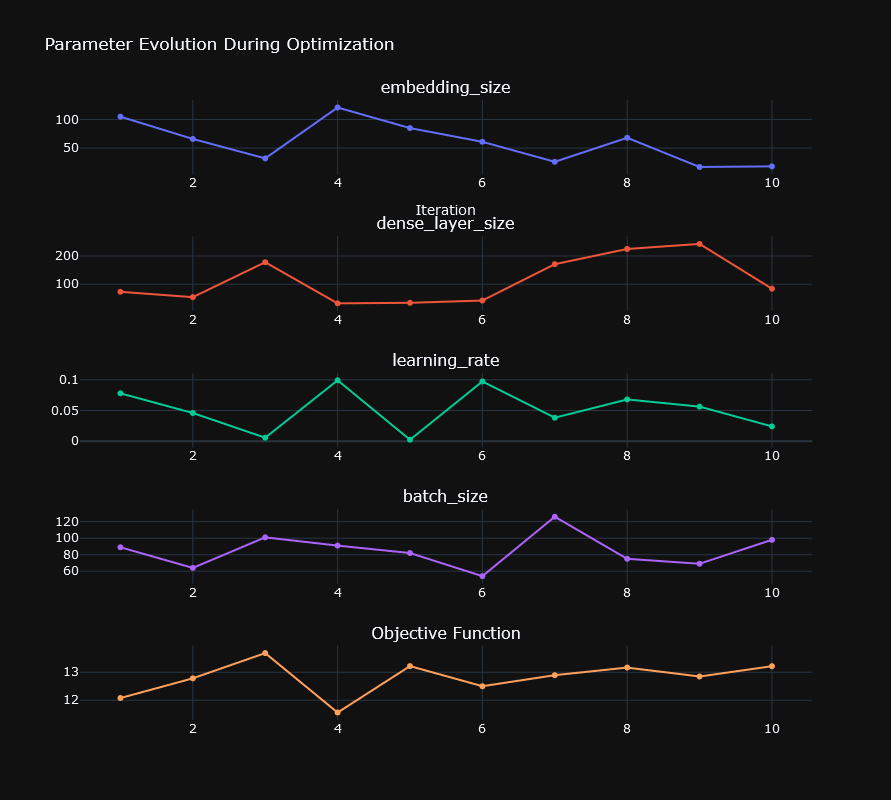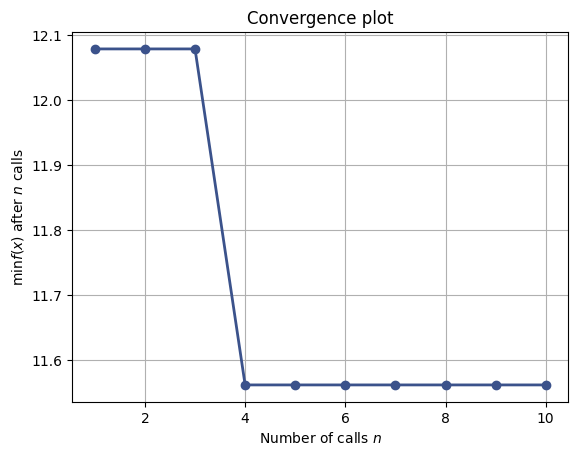

##Regression Model Training and Evaluation

In [ ]:
# Train the final regression model with the best hyperparameters
final_regression_model = create_regression_model([num_users, num_games, best_embedding_size, num_features, best_dense_layer_size, best_learning_rate])
history_regression = final_regression_model.fit([X_train['user-id'], X_train['game-title']], y_train, epochs=100, batch_size=best_batch_size, validation_split=0.2)

# Evaluate the final regression model on the test set
y_pred_regression = final_regression_model.predict([X_test['user-id'], X_test['game-title']])
test_mae_regression = mean_absolute_error(y_test, y_pred_regression)
print(f"Regression Test Mean Absolute Error: {test_mae_regression}")

# Plot training and validation loss for regression model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_regression.history['loss'], label='Training Loss')
plt.plot(history_regression.history['val_loss'], label='Validation Loss')
plt.title('Regression Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE for regression model
plt.subplot(1, 2, 2)
plt.plot(history_regression.history['mae'], label='Training MAE')
plt.plot(history_regression.history['val_mae'], label='Validation MAE')
plt.title('Regression Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap of predictions for regression model
plt.figure(figsize=(10, 8))
sns.heatmap(y_pred_regression, annot=True, cmap='viridis', cbar_kws={'label': 'Predicted Values'})
plt.title('Regression Heatmap of Predicted Values on Test Set')
plt.xlabel('Games')
plt.ylabel('Users')
plt.show()

# Save the regression model
final_regression_model.save('/content/drive/MyDrive/models/regression_linear.h5')

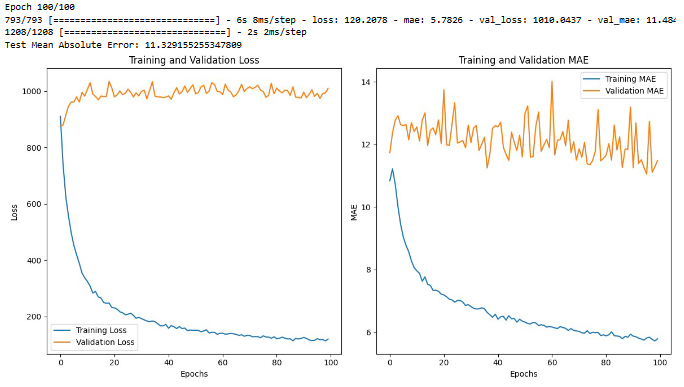

##Classification Model Training and Evaluation

In [ ]:
# Train the final classification model with the best hyperparameters
final_classification_model = create_classification_model([num_users, num_games, best_embedding_size, num_features, best_dense_layer_size, best_learning_rate])
history_classification = final_classification_model.fit([X_train['user-id'], X_train['game-title']], y_train, epochs=100, batch_size=best_batch_size, validation_split=0.2)

# Evaluate the final classification model on the test set
y_pred_classification = final_classification_model.predict([X_test['user-id'], X_test['game-title']])
test_accuracy_classification = accuracy_score(y_test, y_pred_classification)
print(f"Classification Test Accuracy: {test_accuracy_classification}")

# Plot training and validation loss for classification model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_classification.history['loss'], label='Training Loss')
plt.plot(history_classification.history['val_loss'], label='Validation Loss')
plt.title('Classification Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for classification model
plt.subplot(1, 2, 2)
plt.plot(history_classification.history['accuracy'], label='Training Accuracy')
plt.plot(history_classification.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Save the classification model
final_classification_model.save('/content/drive/MyDrive/models/classification_model.h5')


### Recommendation System Evaluation

In [ ]:
def evaluate_recommendation_system(model, X_test, y_test, combined_data, user_encoder, game_encoder, num_recommendations=10):
    # 1. Select a random user with data in the test set
    random_user_index = np.random.choice(X_test['user-id'].unique())
    random_user_id = user_encoder.inverse_transform([random_user_index])[0]

    # 2. Display the user and their top 10 played games from the test dataset
    user_test_data = X_test[X_test['user-id'] == random_user_index]
    top_10_games_indices = user_test_data.sort_values(by='game-title')['game-title'].head(10)
    top_10_games_names = game_encoder.inverse_transform(top_10_games_indices)

    print(f"User: {random_user_id}")
    print("Top 10 Played Games:")
    for game_name in top_10_games_names:
        print(f"- {game_name}")

    # 3. Get games from test that the user has played and try to predict with the model
    user_test_X = user_test_data[['user-id', 'game-title']]
    predicted_times = model.predict([user_test_X['user-id'],user_test_X['game-title']])

    print("\nPredictions vs Actual Time Played:")
    for index, (predicted, actual) in enumerate(zip(predicted_times, y_test.loc[user_test_data.index])):
        game_name = game_encoder.inverse_transform([user_test_X.iloc[index]['game-title']])[0]
        print(f"Game {index + 1}: {game_name}, Predicted = {predicted}, Actual = {actual}")


    unplayed_games = combined_data[combined_data['user-id'] != random_user_index]
    unplayed_games = unplayed_games.drop_duplicates(subset='game-title')
    unplayed_games.loc[:, 'user-id'] = random_user_index

    predictions = model.predict([unplayed_games['user-id'],unplayed_games['game-title']])

    # Add the predictions to the DataFrame
    unplayed_games['predicted_rating'] = predictions.flatten()

    # Top 10 recommendations based on predicted ratings
    top_recommendations = unplayed_games.sort_values(by='predicted_rating', ascending=False).head(10)

    # Inverse transform game-title using game_encoder.inverse_transform
    # Note: Assuming game_encoder is the LabelEncoder used for encoding game titles
    top_recommendations['game-title'] = game_encoder.inverse_transform(top_recommendations['game-title'])

    # Print top 10 recommendations with inverse transformed game titles
    print("Top 10 Recommendations:")
    print(top_recommendations[['game-title', 'predicted_rating']])

    # Visualize predicted ratings distribution
    plt.hist(unplayed_games['predicted_rating'], bins=30, edgecolor='black')
    plt.title('Predicted Ratings Distribution')
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Frequency')
    plt.show()



The above code snippet evaluates the recommendation system based on regression using the final regression model. The `evaluate_recommendation_system` function takes the trained models, test data, combined data, user and game encoders, and provides insights into the system's performance.

- It begins by selecting a random user from the test set and displaying their top 10 played games.
- It compares the predicted and actual time played for games in the test set.
- It generates top 10 recommendations based on predicted ratings and visualizes the distribution of predicted ratings.



### Loading Trained Models and Evaluating Recommendation Systems

In [ ]:
final_regression_model = load_model('/content/drive/MyDrive/models/regression_linear.h5')
final_classification_model = load_model('/content/drive/MyDrive/models/classification_model.h5')
evaluate_recommendation_system(final_classification_model, X_test, y_test, user_game_time_df, label_encoder_user, label_encoder_game)
evaluate_recommendation_system(final_regression_model, X_test, y_test, user_game_time_df, label_encoder_user, label_encoder_game)

The above code snippet loads the pre-trained regression and classification models from the specified file paths. It then evaluates both recommendation systems using the `evaluate_recommendation_system` function.

- For the classification-based recommendation system, the function assesses its performance using the loaded classification model.
- Similarly, for the regression-based recommendation system, the function evaluates its performance using the loaded regression model.

The evaluation process involves displaying top played games by a random user, comparing predicted and actual time played, generating top recommendations based on predicted ratings, and visualizing the distribution of predicted ratings for each recommendation system.


Example run for user 123625432:

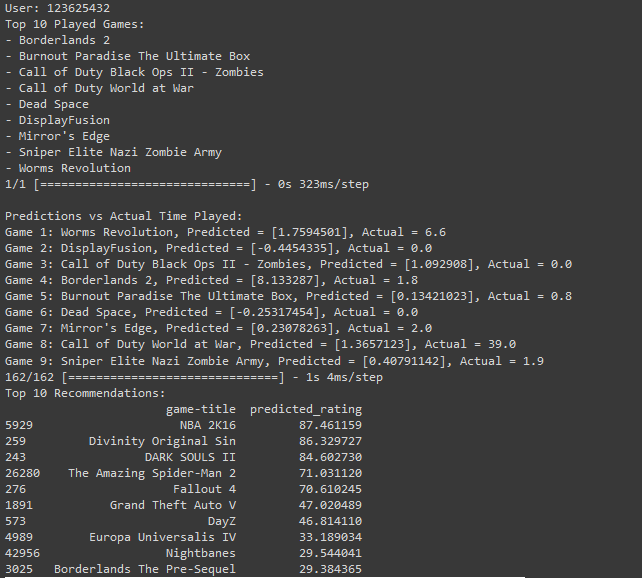